# Classification Notebook Instructions

In [1]:
# Change working directory to be the project root
import os
os.chdir("..")
os.getcwd()

'/Users/aaronquinton/Documents/UBC-MDS/Capstone/BCstats/DSCI_591_capstone-BCStats'

## How to: Train Model on Comment Data

In [3]:
# Import functions
import pandas as pd
import numpy as np
from src.models.wes_classification import model_theme_train

In [182]:
# Read in Qualitative Comments and format for training model
df = pd.read_csv("data/interim/train_2018-qualitative-data.csv", skiprows=0)
df = df[['2018 Comment']].join(df.loc[:,'CPD':'OTH'])
df = df.rename(columns = {'2018 Comment' : 'comment'})

Y = np.array(df.loc[:,"CPD":"OTH"])

In [184]:
df.iloc[:,0]

0        I would suggest having a developmental growth ...
1        Base decisions regarding fish and wildlife on ...
2        Get rid of Leading Workplace Strategies and gi...
3        We are the lowest paid in Canada with a worklo...
4        Official acknowledgement of the limited divers...
5        Long term goals are identified on EPDPs (staff...
6        I feel the hiring process is very daunting and...
7        update in technology and increased funding for...
8        Increase understanding within higher levels of...
9        Longer auxiliary timelines as there is a lot t...
10       Flexible work - Work from home allowed for mob...
11       That hiring of staff was more timely, it takes...
12       More flexibility to participate in courses tha...
13       Policy writers would enhance policy by writing...
14       support for immediately hiring into funded vac...
15       more funding for scientific data collection to...
16       Continue to foster a respectful workplace. It .

In [180]:
import argparse

In [181]:
parser = argparse.ArgumentParser()

In [ ]:
parser.add_argument()

In [5]:
# File Paths for the Pre-trained Embeddings
fname_fasttext_crawl = "./references/pretrained_embeddings.nosync/fasttext/" \
                       "crawl-300d-2M.vec"
fname_w2v_googlenews = "./references/pretrained_embeddings.nosync/w2v/" \
                       "GoogleNews-vectors-negative300.bin"
fname_glove_wiki = "./references/pretrained_embeddings.nosync/glove/" \
                      "glove.6B.300d.w2v.txt"
fname_glove_crawl = "./references/pretrained_embeddings.nosync/glove/" \
                      "glove.840B.300d.w2v.txt"

In [6]:
# Train Models on each embedding
model1 = model_theme_train(df.comment, Y,
                  embedding_filepath=fname_glove_crawl,
                  embedding_name='glove_crawl',
                  save_model_filepath='models/keras_model_glove_crawl.h5',
                  save_tokenizer_filepath='models/tokenizer_glove_crawl.pickle')

model2 = model_theme_train(df.comment, Y,
                  embedding_filepath=fname_glove_wiki,
                  embedding_name='glove_wiki',
                  save_model_filepath='models/keras_model_glove_wiki.h5',
                  save_tokenizer_filepath='models/tokenizer_glove_wiki.pickle')

model3 = model_theme_train(df.comment, Y,
                  embedding_filepath=fname_w2v_googlenews,
                  embedding_name='w2v_google_news',
                  save_model_filepath='models/keras_model_w2v_google_news.h5',
                  save_tokenizer_filepath='models/tokenizer_w2v_google_news.pickle')

model4 = model_theme_train(df.comment, Y,
                  embedding_filepath=fname_fasttext_crawl,
                  embedding_name='fasttext_crawl',
                  save_model_filepath='models/keras_model_fasttext_crawl.h5',
                  save_tokenizer_filepath='models/tokenizer_fasttext_crawl.pickle')

Train on 11286 samples, validate on 1992 samples
Epoch 1/16
11286/11286 [==============================] - 337s 30ms/step - loss: 0.3314 - acc: 0.8837 - val_loss: 0.2523 - val_acc: 0.9083
Epoch 2/16
11286/11286 [==============================] - 331s 29ms/step - loss: 0.2220 - acc: 0.9185 - val_loss: 0.2097 - val_acc: 0.9214
Epoch 3/16
11286/11286 [==============================] - 330s 29ms/step - loss: 0.1915 - acc: 0.9288 - val_loss: 0.1899 - val_acc: 0.9277
Epoch 4/16
11286/11286 [==============================] - 325s 29ms/step - loss: 0.1739 - acc: 0.9342 - val_loss: 0.1860 - val_acc: 0.9285
Epoch 5/16
11286/11286 [==============================] - 323s 29ms/step - loss: 0.1618 - acc: 0.9380 - val_loss: 0.1819 - val_acc: 0.9328
Epoch 6/16
11286/11286 [==============================] - 324s 29ms/step - loss: 0.1516 - acc: 0.9418 - val_loss: 0.1822 - val_acc: 0.9309
Epoch 7/16
11286/11286 [==============================] - 325s 29ms/step - loss: 0.1412 - acc: 0.9459 - val_loss: 0.1

FileNotFoundError: [Errno 2] No such file or directory: './references/pretrained_embeddings.nosync/GoogleNews-vectors-negative300.bin'

## How to: Predict Themes using Trained Model

In [32]:
import pandas as pd
import numpy as np
import pickle
from src.models.wes_classification import model_theme_predict
from src.data.preprocessing_text import preprocess_for_embed
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [69]:
# Read in Qualitative Comments and format for predictions
df_test = pd.read_csv('data/interim/test_2018-qualitative-data.csv')
df_test = df_test[['2018 Comment']].join(df_test.loc[:,'CPD':'OTH'])
df_test = df_test.rename(columns = {'2018 Comment' : 'comment'})

In [10]:
Y_pred_glove_crawl = model_theme_predict(df_test.comment,
    embedding_name='glove_crawl',
    load_model_filepath='models/keras_model_glove_crawl.h5',
    load_tokenizer_filepath='models/tokenizer_glove_crawl.pickle')

Y_pred_glove_wiki = model_theme_predict(df_test.comment,
    embedding_name='glove_wiki',
    load_model_filepath='models/keras_model_glove_wiki.h5',
    load_tokenizer_filepath='models/tokenizer_glove_wiki.pickle')

# Y_pred_w2v_google_news = model_theme_predict(df_test.comment,
#     embedding_name='w2v_google_news',
#     load_model_filepath='models/keras_model_w2v_google_news.h5',
#     load_tokenizer_filepath='models/tokenizer_w2v_google_news.pickle')

# Y_pred_fasttext_crawl = model_theme_predict(df_test.comment,
#     embedding_name='fasttext_crawl',
#     load_model_filepath='models/keras_model_fasttext_crawl.h5',
#     load_tokenizer_filepath='models/tokenizer_fasttext_crawl.pickle')

In [68]:
theme_results(Y_test, np.round(Y_pred_glove_crawl))

Overall Accuracy: 0.0597 
Hamming Loss: 0.202 
Hamming Loss (pred. zeros): 0.1319


,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,195,159,0.211525,-0.079322,0.788475,0.132075,0.107692
1,CB,316,264,0.324068,-0.109831,0.675932,0.193182,0.161392
2,EWC,200,96,0.180339,-0.044746,0.819661,0.156250,0.075000
3,Exec,134,130,0.161356,-0.070508,0.838644,0.100000,0.097015
4,FWE,59,71,0.085424,-0.045424,0.914576,0.028169,0.033898
5,SP,195,138,0.195932,-0.063729,0.804068,0.159420,0.112821
6,RE,129,66,0.122712,-0.035254,0.877288,0.106061,0.054264
7,Sup,174,154,0.207458,-0.089492,0.792542,0.071429,0.063218
8,SW,255,223,0.276610,-0.103729,0.723390,0.156951,0.137255
9,TEPE,438,314,0.383729,-0.086780,0.616271,0.296178,0.212329


## How to: Evaluate Performance

In [12]:
from src.models.eval_metrics import theme_results, investigate_results

In [72]:
Y_test = np.array(df_test.loc[:,"CPD":"OTH"])

In [74]:
Y_pred = (Y_pred_glove_crawl)# +
          #Y_pred_glove_wiki)/2
          #Y_pred_w2v_google_news +
          #Y_pred_fasttext_crawl)/4

theme_results(Y_test, np.round(Y_pred))

Overall Accuracy: 0.4976 
Hamming Loss: 0.0649 
Hamming Loss (pred. zeros): 0.122


,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,184,159,0.061695,0.063051,0.938305,0.792453,0.684783
1,CB,293,264,0.040000,0.158644,0.960000,0.943182,0.849829
2,EWC,141,96,0.068475,0.027119,0.931525,0.708333,0.482270
3,Exec,149,130,0.079322,0.021695,0.920678,0.623077,0.543624
4,FWE,91,71,0.023051,0.038644,0.976949,0.901408,0.703297
5,SP,145,138,0.060339,0.037966,0.939661,0.702899,0.668966
6,RE,124,66,0.069153,0.014915,0.930847,0.666667,0.354839
7,Sup,216,154,0.093559,0.052881,0.906441,0.753247,0.537037
8,SW,244,223,0.092881,0.072542,0.907119,0.739910,0.676230
9,TEPE,341,314,0.060339,0.170847,0.939661,0.901274,0.829912


In [16]:
theme_results(np.round(Y_pred_glove_crawl))

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [17]:
Y_pred_glove_crawl.shape

(1475, 12)

In [20]:
Y_test

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [23]:
theme_results(Y_test, np.round(Y_pred_glove_crawl-0.3))

Overall Accuracy: 0.0644 
Hamming Loss: 0.1823 
Hamming Loss (pred. zeros): 0.1319


,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,195,121,0.195254,-0.063051,0.804746,0.115702,0.071795
1,CB,316,242,0.313220,-0.098983,0.686780,0.198347,0.151899
2,EWC,200,57,0.163390,-0.027797,0.836610,0.140351,0.040000
3,Exec,134,76,0.130169,-0.039322,0.869831,0.118421,0.067164
4,FWE,59,62,0.079322,-0.039322,0.920678,0.032258,0.033898
5,SP,195,105,0.181695,-0.049492,0.818305,0.152381,0.082051
6,RE,129,36,0.107797,-0.020339,0.892203,0.083333,0.023256
7,Sup,174,98,0.173559,-0.055593,0.826441,0.081633,0.045977
8,SW,255,150,0.246102,-0.073220,0.753898,0.140000,0.082353
9,TEPE,438,283,0.370847,-0.073898,0.629153,0.307420,0.198630


In [77]:
Y_pred_glove_crawl.shape

(1475, 12)

In [79]:
Y_test.shape

(1475, 12)

In [165]:
%autoreload


In [168]:
import src
from src.models.eval_metrics import plot_theme_ROC

In [172]:
from src.models.eval_metrics import plot_average_ROC_by_embed

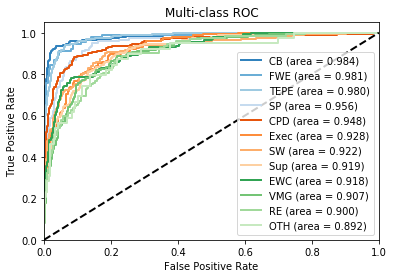

In [169]:
plot_theme_ROC(Y_test, Y_pred_glove_crawl)

In [170]:
Y_pred = {}
Y_pred["glove_crawl"] = Y_pred_glove_crawl
Y_pred["gllove_wiki"] = Y_pred_glove_wiki

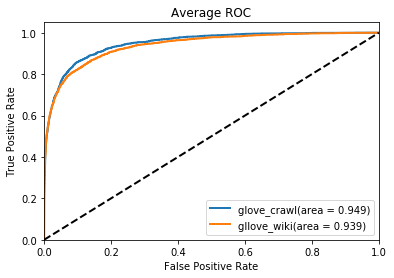

In [173]:
plot_average_ROC_by_embed(Y_test, Y_pred)